<a href="https://colab.research.google.com/github/tranviviana/PyTorch/blob/main/01_PytorchWorkflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. get data ready (convert to tensors)
2. Build or pick a pretrained model

*   Pick a loss function and optimizer
*   Build a training loop
3. Fit the model to the data and make a prediction
4. Evaluate the model
5. Improve through experimentation
6. Save and reload your trained model

Exploring end to end workflow


In [3]:
what_were_covering = {1: "data (prepare and load)",
                      2: "build model",
                      3: "fitting the model to data (training)",
                      4: "making predictions and evaluating a model (inference)",
                      5: "saving and loading a model",
                      6: "putting it all together"
}
what_were_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluating a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [4]:
import torch
from torch import nn ##nn contains all of pytorch's building blocks for neural networks
import matplotlib.pyplot as plt

torch.__version__

'2.3.1+cu121'

##1. data: preparing and loading

could be anything


*   excel
*   images
*   Videos/audio/text
*   DNA


ML is a game of two parts:
1. get data into numerical representation
2. Build a model to learn patters about it

Using a linear regression formula to make a straight line with known **parameters**


In [5]:
#create *known* parameters
weight = 0.7 #slope
bias = 0.3 #intercept

#create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim =1)
Z = X.squeeze(dim=1)
Y = weight * X + bias

X[:10], Y[:10], Z[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 tensor([0.0000, 0.0200, 0.0400, 0.0600, 0.0800, 0.1000, 0.1200, 0.1400, 0.1600,
         0.1800]))

In [6]:
len(X), len(Y)

(50, 50)

In [7]:
#have our system figure out our formula
#splitting data into training and testing data --> important !
#training -> set the model learns patterns from ; validation -> tuning model ; test -> ready for new stuff


In [8]:
# create a train/test split
train_split = int(0.8 * len(X))
X_train, Y_train = X[:train_split], Y[:train_split]
X_test, Y_test = X[train_split:], Y[train_split:]

len(X_train), len(Y_train), len(X_test), len(Y_test)

(40, 40, 10, 10)

In [9]:
#visualizing data -> matplot
def plot_predictions(train_data = X_train,
                     train_labels = Y_train,
                     test_data = X_test,
                     test_labels = Y_test,
                     predictions = None):
  #plots training data, test data, and compares predictions
  plt.figure(figsize=(10,7))
  #training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training Data")
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing Data")

  #Are there predictions
  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
  plt.legend(prop={"size": 14})


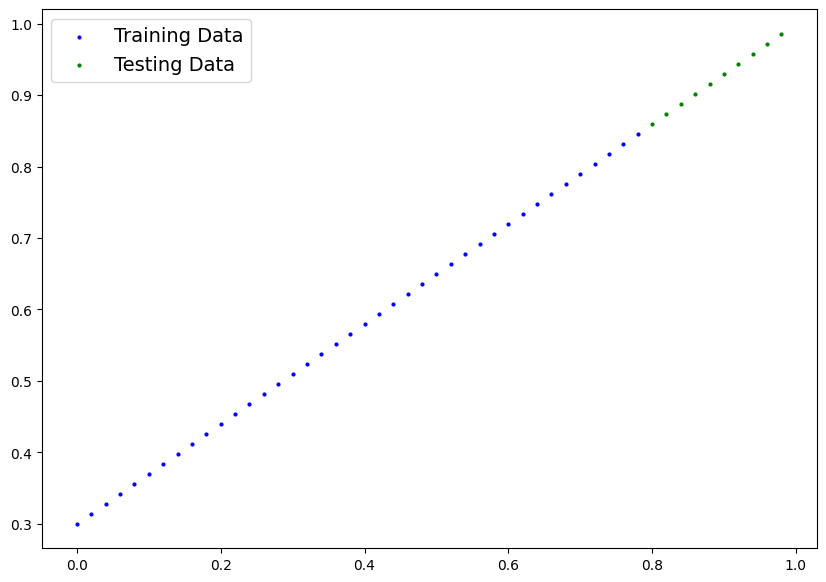

In [10]:
plot_predictions()

##2. Building model

1. Starts with random values (weight and bias)
2. Looks at training data and adjusts values to the ideal value

How does it do so?
1. gradient descent
2. backpropagation

In [11]:
#linear regression model class
class LinearRegressionModel(nn.Module):
  #good inheritor
  def __init__(self):
    super().__init__()
    self.weight = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.rand(1,
                                      requires_grad=True,
                                      dtype=torch.float))
  # Forward method to define the computation in the model
  #x: is input type -> output type
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weight * x + self.bias




### pytorch model building essentials
* torch.nn - contains all of the buildings for computational graphs (aka neural nets)
* torch.nn.Parameter - what parameters are trying to learn, usually torch.nn will set this for us
* torch.nn.Module - base class for all nn modules, make sure to override forward if you make on
* torch.optim - this is where the optimizers in PyTorch live, helps with grad descent
* def forward() - all nn.module subclasses require and override tells what you are doing
https://pytorch.org/tutorials/beginner/ptcheat.html

In [12]:
### Checking contents of our pytorch model
#.parameters() check our model parameters
torch.manual_seed(42)
#create an instance of the model we created
model_0 = LinearRegressionModel()
model_0
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.3904], requires_grad=True)]

In [13]:
#named parameters
model_0.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.3904]))])

### predictions through torch.inference_mode()

To check our model's predictive power, lets see how well it predicts our dependent variable from our independent variable
pass date throuhg --> forward()

In [14]:
X_test, Y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [15]:
with torch.inference_mode(): #inference mode takes out the grad funcion
  y_preds= model_0(X_test)
  #torch.no_grad() similar but inference is preferred
y_preds


tensor([[0.6598],
        [0.6665],
        [0.6733],
        [0.6800],
        [0.6867],
        [0.6935],
        [0.7002],
        [0.7069],
        [0.7137],
        [0.7204]])

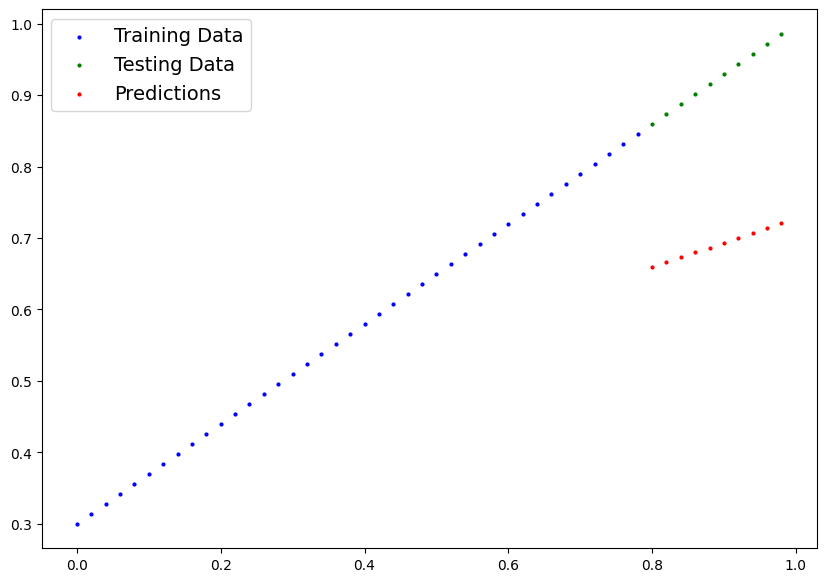

In [16]:
#the "random" predictions
plot_predictions(predictions = y_preds)

###2. Creating Training Code

move from unknown parameters to known parameters -> bad representation to good representation

Measure how poor/wrong model is, create a loss function(criterion/ cost function)

Things we need to train

**Loss Function**: function to measure how off a prediction is

**Optimizer**: take into account the loss of a model and adjusts the models parameters

    - inside an optimizer you have
        - params - the model parameters
        - lr (learning rate) - the hyperparameter that defines how big/small the optimizer changes the parameters with each step

And specifically for PyTorch, we need


*   training loop
*   testing loop



In [17]:
#looking at models parameters
model_0.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.3904]))])

In [18]:
##setting up the loss function
"""MAE_loss (l1 norm) = torch.mean(torch.abs(y_pred-Y_test))"""
loss_fn = torch.nn.L1Loss()
## setting up the optimizer (stochastic gradient descent) changes one till it messes up and changes the other
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr = 0.01) #lr learning rate = adjustment rate

In [19]:
##Building a Training Loop (and teseting loop)

"""
0. Loop through the data
1. forward pass (this involves data moving through forward functions) to make predictions on data
2. Calculate the loss - compare pass predictions to ground truth labels
3. Optimizer zero grad
4. Loss backward [Back Propogation] - move backwards through the network to calculate the gradients of each of the parameters of our model with respect to loss
5. Optimizer step [gradient descent] - use optimizer to adjust our model's parameters to try and improve the loss
"""

"\n0. Loop through the data \n1. forward pass (this involves data moving through forward functions) to make predictions on data\n2. Calculate the loss - compare pass predictions to ground truth labels\n3. Optimizer zero grad\n4. Loss backward [Back Propogation] - move backwards through the network to calculate the gradients of each of the parameters of our model with respect to loss\n5. Optimizer step [gradient descent] - use optimizer to adjust our model's parameters to try and improve the loss\n"

In [20]:
# an epoch is one loop through the data ...
epochs = 200 #hyperparameter becasue we've set them ourselves

#track different values
epoch_count = []
loss_values = []
test_loss_values = []
##Learning on the data!!!

###training
#0. loop through the data
for epoch in range(epochs):
  #set model to training mode ... require gradients
  model_0.train()
  #1. Foward pass
  y_pred = model_0(X_train) #passing through the training data (part 1)

  #2. Calculate the loss
  loss = loss_fn(y_pred, Y_train) #from setting up loss function
  print(f"loss {loss}")
  #3. Optimizer zero grad
  optimizer.zero_grad()

  #4. Perform backpropagation on the loss with repsect to the parameters of the model
  loss.backward()

  #5. step the optimizer (perform gradient descent)
  optimizer.step() #by default how the optimizer accumulates so we have to zero it so the step doesnt change

  #testing
  model_0.eval() #tusn off different settings in model not needed for evaluation(dropout/matchnorm)
  with torch.inference_mode(): #turns off gradient tracking
    #1. do the forward pass
    test_pred = model_0(X_test)

    #2. calculate the loss
    test_loss = loss_fn(test_pred,Y_test)
  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")
    print(model_0.state_dict())



loss 0.08169572055339813
Epoch: 0 | Loss: 0.08169572055339813 | Test loss: 0.22662055492401123
OrderedDict([('weight', tensor([0.3398])), ('bias', tensor([0.3939]))])
loss 0.07951223105192184
loss 0.07771821320056915
loss 0.07596267759799957
loss 0.07452543079853058
loss 0.07310795783996582
loss 0.07197895646095276
loss 0.0708499550819397
loss 0.0698218122124672
loss 0.06895165145397186
loss 0.06808149069547653
Epoch: 10 | Loss: 0.06808149069547653 | Test loss: 0.1807345449924469
OrderedDict([('weight', tensor([0.3672])), ('bias', tensor([0.4154]))])
loss 0.06732632219791412
loss 0.06666463613510132
loss 0.06600294262170792
loss 0.06540142744779587
loss 0.06489682197570801
loss 0.06439221650362015
loss 0.06388760358095169
loss 0.06338393688201904
loss 0.062983937561512
loss 0.06258393079042435
Epoch: 20 | Loss: 0.06258393079042435 | Test loss: 0.15627031028270721
OrderedDict([('weight', tensor([0.3891])), ('bias', tensor([0.4204]))])
loss 0.062183927744627
loss 0.06178393214941025
loss

In [21]:
epoch_count, loss_values, test_loss_values

([0,
  10,
  20,
  30,
  40,
  50,
  60,
  70,
  80,
  90,
  100,
  110,
  120,
  130,
  140,
  150,
  160,
  170,
  180,
  190],
 [tensor(0.0817, grad_fn=<MeanBackward0>),
  tensor(0.0681, grad_fn=<MeanBackward0>),
  tensor(0.0626, grad_fn=<MeanBackward0>),
  tensor(0.0588, grad_fn=<MeanBackward0>),
  tensor(0.0553, grad_fn=<MeanBackward0>),
  tensor(0.0518, grad_fn=<MeanBackward0>),
  tensor(0.0484, grad_fn=<MeanBackward0>),
  tensor(0.0449, grad_fn=<MeanBackward0>),
  tensor(0.0415, grad_fn=<MeanBackward0>),
  tensor(0.0381, grad_fn=<MeanBackward0>),
  tensor(0.0346, grad_fn=<MeanBackward0>),
  tensor(0.0312, grad_fn=<MeanBackward0>),
  tensor(0.0278, grad_fn=<MeanBackward0>),
  tensor(0.0243, grad_fn=<MeanBackward0>),
  tensor(0.0209, grad_fn=<MeanBackward0>),
  tensor(0.0175, grad_fn=<MeanBackward0>),
  tensor(0.0140, grad_fn=<MeanBackward0>),
  tensor(0.0106, grad_fn=<MeanBackward0>),
  tensor(0.0072, grad_fn=<MeanBackward0>),
  tensor(0.0037, grad_fn=<MeanBackward0>)],
 [tensor(

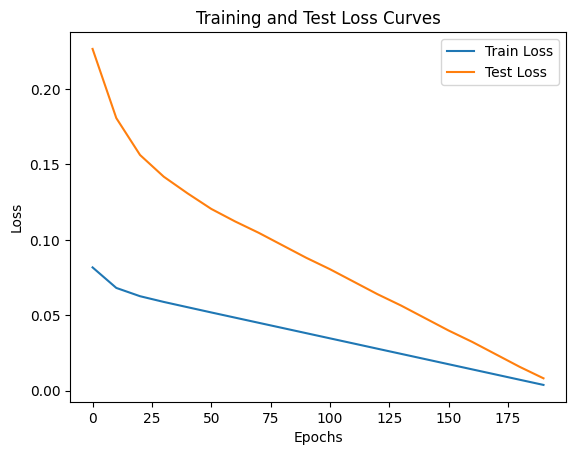

In [22]:
import numpy as np
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label = "Train Loss")
plt.plot(epoch_count, np.array(torch.tensor(test_loss_values).numpy()), label = "Test Loss")
plt.title("Training and Test Loss Curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

In [23]:
print(np.array(torch.tensor(loss_values).numpy()))
print(loss_values)
print(np.array(torch.tensor(test_loss_values).numpy()))
print(test_loss_values)

[0.08169572 0.06808149 0.06258393 0.05879194 0.05530194 0.05182225
 0.04838594 0.04494876 0.04152032 0.03808232 0.03464684 0.03121751
 0.02777871 0.0243449  0.0209139  0.01747509 0.01404297 0.01061027
 0.00717147 0.00374104]
[tensor(0.0817, grad_fn=<MeanBackward0>), tensor(0.0681, grad_fn=<MeanBackward0>), tensor(0.0626, grad_fn=<MeanBackward0>), tensor(0.0588, grad_fn=<MeanBackward0>), tensor(0.0553, grad_fn=<MeanBackward0>), tensor(0.0518, grad_fn=<MeanBackward0>), tensor(0.0484, grad_fn=<MeanBackward0>), tensor(0.0449, grad_fn=<MeanBackward0>), tensor(0.0415, grad_fn=<MeanBackward0>), tensor(0.0381, grad_fn=<MeanBackward0>), tensor(0.0346, grad_fn=<MeanBackward0>), tensor(0.0312, grad_fn=<MeanBackward0>), tensor(0.0278, grad_fn=<MeanBackward0>), tensor(0.0243, grad_fn=<MeanBackward0>), tensor(0.0209, grad_fn=<MeanBackward0>), tensor(0.0175, grad_fn=<MeanBackward0>), tensor(0.0140, grad_fn=<MeanBackward0>), tensor(0.0106, grad_fn=<MeanBackward0>), tensor(0.0072, grad_fn=<MeanBackward

In [24]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

In [25]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.6962])), ('bias', tensor([0.3064]))])

In [26]:
weight, bias


(0.7, 0.3)

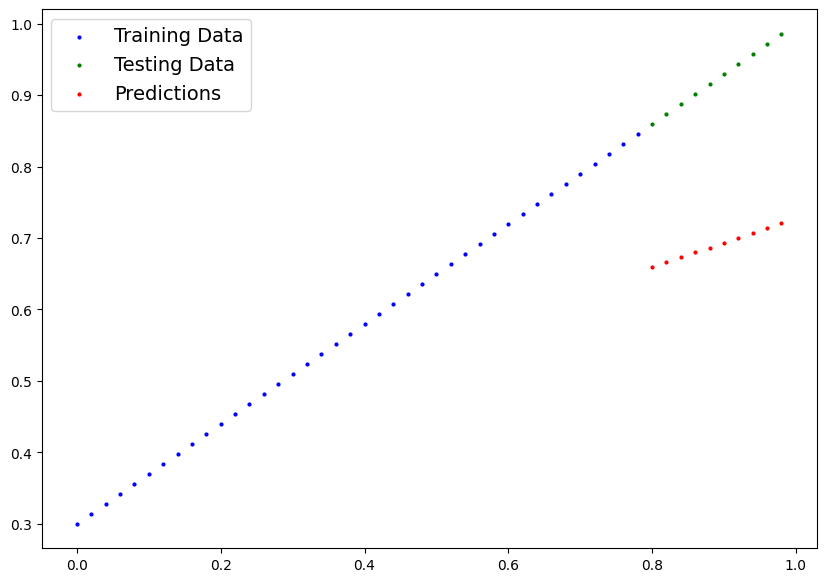

In [27]:
plot_predictions(predictions=y_preds)

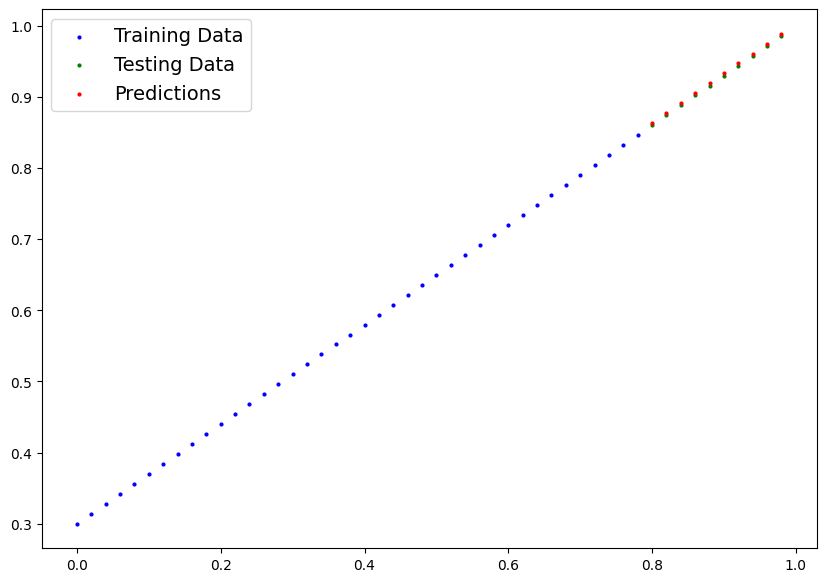

In [28]:
plot_predictions(predictions=y_preds_new)

###Saving a model in PyTorch

Three main methods
1. torch.save() = saves object in pickle
2. torch.load() = loads object
3. torch.nn.Module.load_state_dict() = load a model's save state dictionary
https://pytorch.org/tutorials/beginner/saving_loading_models.html#saving-loading-model-for-inference

In [29]:
# saving model
from pathlib import Path

# 1. create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

#create model save path
MODEL_NAME = '01_pytorch_workflow_model_0.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
MODEL_SAVE_PATH

#save the model state_dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), f= MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_0.pth


In [30]:
!ls -l models

total 4
-rw-r--r-- 1 root root 1680 Aug 14 23:49 01_pytorch_workflow_model_0.pth


In [31]:
#loading model; must create a new instance load saved dict into. that
print(model_0.state_dict())

loaded_model_0 = LinearRegressionModel()

loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

OrderedDict([('weight', tensor([0.6962])), ('bias', tensor([0.3064]))])


<All keys matched successfully>

In [32]:
# make predictions with loaded model
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)
loaded_model_preds

tensor([[0.8634],
        [0.8773],
        [0.8913],
        [0.9052],
        [0.9191],
        [0.9330],
        [0.9469],
        [0.9609],
        [0.9748],
        [0.9887]])

In [33]:
model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)
y_preds

tensor([[0.8634],
        [0.8773],
        [0.8913],
        [0.9052],
        [0.9191],
        [0.9330],
        [0.9469],
        [0.9609],
        [0.9748],
        [0.9887]])

In [34]:
#compare what we had
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

##6 Putting it all together

In [35]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np

# check pytorch version
torch.__version__

'2.3.1+cu121'

In [36]:
#device agnostic code (code for gpu)
if torch.cuda.is_available():
  device ="cuda"
else:
  device = "cpu"
print(f"Using device: {device}")

Using device: cuda


In [39]:
#check device
!nvidia-smi



Wed Aug 14 23:49:59 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8               9W /  70W |      3MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

###6.1 Data

In [41]:
#create some data using the linear regression formula: y = weight * x + bias
weight = 0.7
bias = 0.3

# Create range value
start = 0
end = 1
step = 0.02

#create X and y
X = torch.arange(start,end,step).unsqueeze(dim=1) #need unsqueeze of you get errors
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [42]:
#split data
training_split = int(0.8 * len(X))
X_train = X[:training_split]
X_test = X[training_split:]
y_train = y[:training_split]
y_test = y[training_split:]


40

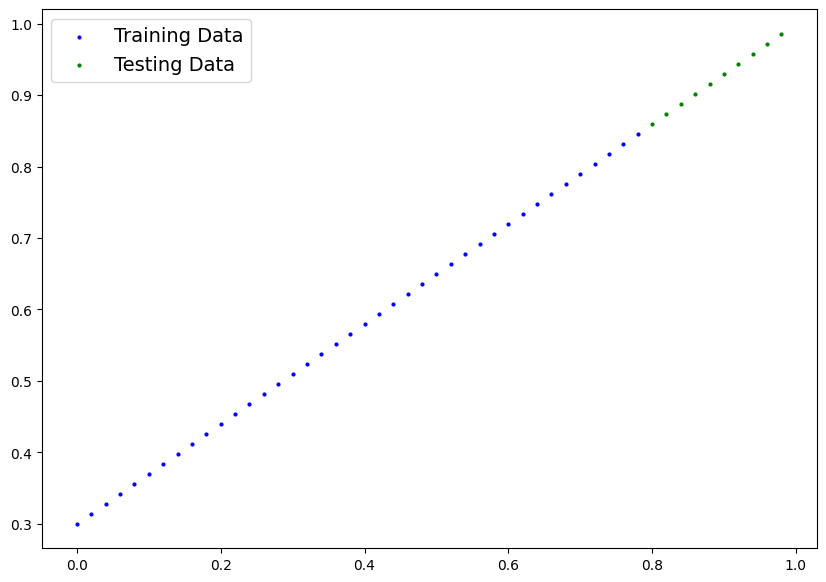

In [43]:
#visualizing data -> matplot
def plot_predictions(train_data = X_train,
                     train_labels = Y_train,
                     test_data = X_test,
                     test_labels = Y_test,
                     predictions = None):
  #plots training data, test data, and compares predictions
  plt.figure(figsize=(10,7))
  #training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training Data")
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing Data")

  #Are there predictions
  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
  plt.legend(prop={"size": 14})
#plot the data with plot_predictions() loaded
plot_predictions(X_train, y_train, X_test, y_test)

##6.2 Building the pytorch linear model


In [44]:
#create a linear model by subclassing nn.model
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    # Use nn.Linear() for creating the model parameters
    #shorthand from previous weights and bias
    self.linear_layer = nn.Linear(in_features=1,
                                  out_features=1)
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [47]:
#check model
next(model_1.parameters()).device
#set the model to use the target device
model_1.to(device)
next(model_1.parameters()).device


device(type='cuda', index=0)

###6.3 Training

In [48]:
#setting up loss function
loss_fn = nn.L1Loss()
#setting up optimizer
optimizer = torch.optim.SGD(params = model_1.parameters(), lr = 0.01)


In [51]:
#training loop
torch.manual_seed(42)

epochs = 200

#put data on GPU
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  model_1.train()

  #forward pass
  y_pred = model_1(X_train)

  #calculate loss
  loss = loss_fn(y_pred, y_train)

  #set optimizer to 0
  optimizer.zero_grad()

  #backpropagation
  loss.backward()

  #optimzie
  optimizer.step()

  #TESTING
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)

    test_loss = loss_fn(test_pred, y_test)
  #print out whats happening
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Loss: 0.5551779866218567 | Test loss: 0.5739762187004089
Epoch: 10 | Loss: 0.439968079328537 | Test loss: 0.4392664134502411
Epoch: 20 | Loss: 0.3247582018375397 | Test loss: 0.30455657839775085
Epoch: 30 | Loss: 0.20954833924770355 | Test loss: 0.16984669864177704
Epoch: 40 | Loss: 0.09433845430612564 | Test loss: 0.03513690456748009
Epoch: 50 | Loss: 0.023886388167738914 | Test loss: 0.04784907028079033
Epoch: 60 | Loss: 0.019956795498728752 | Test loss: 0.045803118497133255
Epoch: 70 | Loss: 0.016517987474799156 | Test loss: 0.037530567497015
Epoch: 80 | Loss: 0.013089174404740334 | Test loss: 0.02994490973651409
Epoch: 90 | Loss: 0.009653178043663502 | Test loss: 0.02167237363755703
Epoch: 100 | Loss: 0.006215683650225401 | Test loss: 0.014086711220443249
Epoch: 110 | Loss: 0.00278724217787385 | Test loss: 0.005814164876937866
Epoch: 120 | Loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 130 | Loss: 0.0012645035749301314 | Test loss: 0.013801801018416

In [52]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [53]:
weight,bias

(0.7, 0.3)

###6.4 making and evaluating predictions

In [54]:
#turn model into eval mode
model_1.eval()

#make predictions on test data
with torch.inference_mode():
  y_preds = model_1(X_test)
y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]], device='cuda:0')

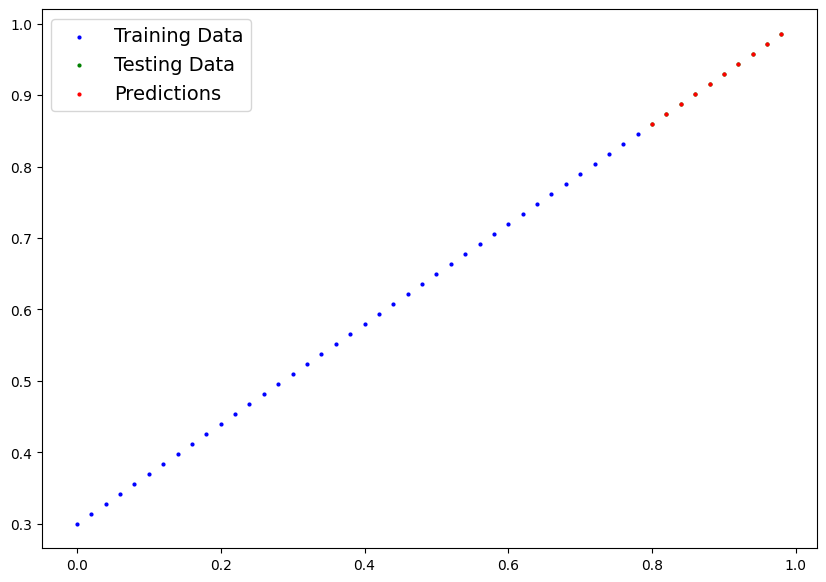

In [57]:
#plot predictions
plot_predictions(predictions=y_preds.cpu())

##6.5 Saving and Loading model

In [61]:
from pathlib import Path

#create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents = True, exist_ok = True)

#create model save path
MODEL_NAME = '01_pytorch_workflow_model_1.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
MODEL_SAVE_PATH

#save state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(), f= MODEL_SAVE_PATH)



Saving model to: models/01_pytorch_workflow_model_1.pth


In [62]:
#load model
#create instance
loaded_model_1 = LinearRegressionModelV2()

#load the saved model
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

#put loaded model to device
loaded_model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [63]:
next(loaded_model_1.parameters()).device

device(type='cuda', index=0)

In [64]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [66]:
#evalueate loaded model
loaded_model_1.eval()
with torch.inference_mode():
  loaded_model_1_preds = loaded_model_1(X_test)
y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')